<a href="https://colab.research.google.com/github/Kantethiara/Hack2Hiere_TechTech_DataScience_81/blob/main/Model/Databeez_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DataBeez Hack2Hire Test Technique - Data Science
##Projet : Credit Scoring
Auteur: *Thiara KANTEYE*

### **I.Introduction**

Le *Credit Scoring* est un outil crucial dans le secteur financier, utilisé pour évaluer la capacité d'un individu ou d'une entreprise à rembourser un crédit. Grâce à des données historiques et des algorithmes de machine learning, les institutions financières peuvent prédire la probabilité qu'un client soit en mesure de respecter ses engagements financiers. Ce processus améliore la gestion des risques tout en facilitant une prise de décision rapide et précise pour l'octroi de crédits.

Dans ce projet, nous travaillons avec la base de données **German Credit Data**, qui contient des informations détaillées sur les caractéristiques socio-économiques et financières des individus. L'objectif principal est de développer un modèle de prédiction permettant de déterminer si une demande de crédit représente un *bon risque* ou un *mauvais risque*.

Les principales étapes de ce projet incluent :
1. **Exploration et analyse des données** : Comprendre les variables clés, détecter les relations significatives et identifier les facteurs les plus influents sur l'octroi de crédit.
2. **Préparation des données** : Nettoyer, encoder et transformer les données pour rendre le jeu de données compatible avec les algorithmes de machine learning.
3. **Développement d’un modèle prédictif** : Entraîner et évaluer plusieurs algorithmes pour sélectionner celui offrant les meilleures performances en termes de précision et de robustesse.
4. **Déploiement et visualisation** : Créer un fichier Docker pour le déploiement du modèle et développer un tableau de bord interactif via **Power BI** ou **Looker Studio** afin de rendre les résultats compréhensibles et accessibles aux décideurs.

Ce projet s'inscrit dans une logique d'application concrète des sciences des données pour résoudre un problème réel. Il démontre comment les outils de machine learning, associés à une infrastructure moderne (comme Docker pour le déploiement), peuvent transformer les données en informations exploitables, renforçant ainsi les capacités de prise de décision stratégique dans le domaine du crédit.

### 1.Exploration et analyse des données

In [ ]:
#Importer les bibliothéque requise
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [ ]:
#Chargement de la base de donnees
from google.colab import files
files.upload()


Saving german_credit_data.csv to german_credit_data.csv


{'german_credit_data.csv': b',Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk\n0,67,male,2,own,NA,little,1169,6,radio/TV,good\n1,22,female,2,own,little,moderate,5951,48,radio/TV,bad\n2,49,male,1,own,little,NA,2096,12,education,good\n3,45,male,2,free,little,little,7882,42,furniture/equipment,good\n4,53,male,2,free,little,little,4870,24,car,bad\n5,35,male,1,free,NA,NA,9055,36,education,good\n6,53,male,2,own,quite rich,NA,2835,24,furniture/equipment,good\n7,35,male,3,rent,little,moderate,6948,36,car,good\n8,61,male,1,own,rich,NA,3059,12,radio/TV,good\n9,28,male,3,own,little,moderate,5234,30,car,bad\n10,25,female,2,rent,little,moderate,1295,12,car,bad\n11,24,female,2,rent,little,little,4308,48,business,bad\n12,22,female,2,own,little,moderate,1567,12,radio/TV,good\n13,60,male,1,own,little,little,1199,24,car,bad\n14,28,female,2,rent,little,little,1403,15,car,good\n15,32,female,1,own,moderate,little,1282,24,radio/TV,bad\n16,53,male,2,own,NA,NA,2424,24,

In [ ]:
#Importer la base de donnees
df = pd.read_csv('german_credit_data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
!pip install -U ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4309582e6e3b6a3a4ea453bea9e48a66365491444106907a2076b371cd29480d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

# Créer le rapport de profilage
profile = ProfileReport(df, title="Profiling Report de credit_data.csv", explorative=True)

# Afficher le rapport dans un notebook Jupyter
profile.to_notebook_iframe()

# Exporter le rapport en fichier HTML
profile.to_file("rapport_credit_data.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### **Analyse du ProfileReport**

Le *ProfileReport* fournit une vue d’ensemble détaillée des variables composant notre base de données. Celle-ci est constituée de **1 000 observations** réparties sur **10 colonnes**, comprenant :  
- **3 variables catégoriques**,  
- **7 variables numériques**.  

### **Constats initiaux** :
- **Absence de doublons** : Aucune ligne dupliquée n’a été détectée (Duplicate rows : 0).  
- **Valeurs manquantes** : Deux variables contiennent des données manquantes :  
  - Saving accounts (817 valeurs manquantes),  
  - Checking account (606 valeurs manquantes).  

### **Analyse univariée**  

1. **Age**  
   - Âge minimum : **19 ans**  
   - Âge maximum : **75 ans**  
   - Âge moyen : **36 ans**

2. **Sexe**  
   - Hommes : **690 individus** (majoritaires)  
   - Femmes : **310 individus**

3. **Job**  
   - Répartition des statuts professionnels :  
     - **630 clients** : statut qualifié (*skilled*).  
     - **200 clients** : non qualifié et résident (*unskilled and resident*).  
     - **148 clients** : hautement qualifié (*highly skilled*).  
     - **22 clients** : non qualifié et non résident (*unskilled and non-resident*).

4. **Housing**  
   - Propriétaires de leur logement : **713 individus** (majoritaires).  
   - Locataires : **170 individus**.  
   - Statut d’habitation gratuit : **108 individus**.

5. **Saving et Checking accounts**  
   - Les comptes avec de **petites sommes d'argent** ou des **sommes modérées** sont les plus fréquents, contrairement aux comptes dits **riches** ou **très riches**, qui sont rares dans notre jeu de données.

6. **Credit amount**  
   - Montant minimum de crédit : **250 DM**.  
   - Montant maximum de crédit : **18 424 DM**.  
   - Montant moyen de crédit : **3 271 DM**.

7. **Duration**  
   - Durée moyenne des prêts : **21 mois**.

8. **Purpose**  
   - Les motifs les plus fréquents de prêts concernent :  
     - **L’achat de voitures**,  
     - **Les appareils radio/TV**,  
     - **Les fournitures/équipements**.  
   - Les motifs moins fréquents incluent :  
     - **Les affaires**,  
     - **L’éducation**,  
     - **Les autres motifs divers**.

9. **Risk**  
   - **700 clients** sont classés comme ayant un *bon risque* (majoritaires).  
   - **300 clients** sont classés comme ayant un *mauvais risque*.


### **Analyse bivariée**

Lors d’une première analyse des corrélations :  
- Une forte relation est observée entre **Credit amount** et **Duration**.  

### **Étapes suivantes**  

Nous approfondirons ces observations grâce à des visualisations graphiques pour valider et enrichir les conclusions tirées du rapport de profilage. Ces graphiques permettront d’identifier d’éventuelles tendances cachées et d’obtenir des insights plus clairs sur les relations entre les différentes variables de la base de données.

In [ ]:
# Identifier les valeurs manquantes
missing_data = df.isnull().sum() / len(df) * 100
print("Pourcentage de valeurs manquantes :\n", missing_data)


Pourcentage de valeurs manquantes :
 Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64


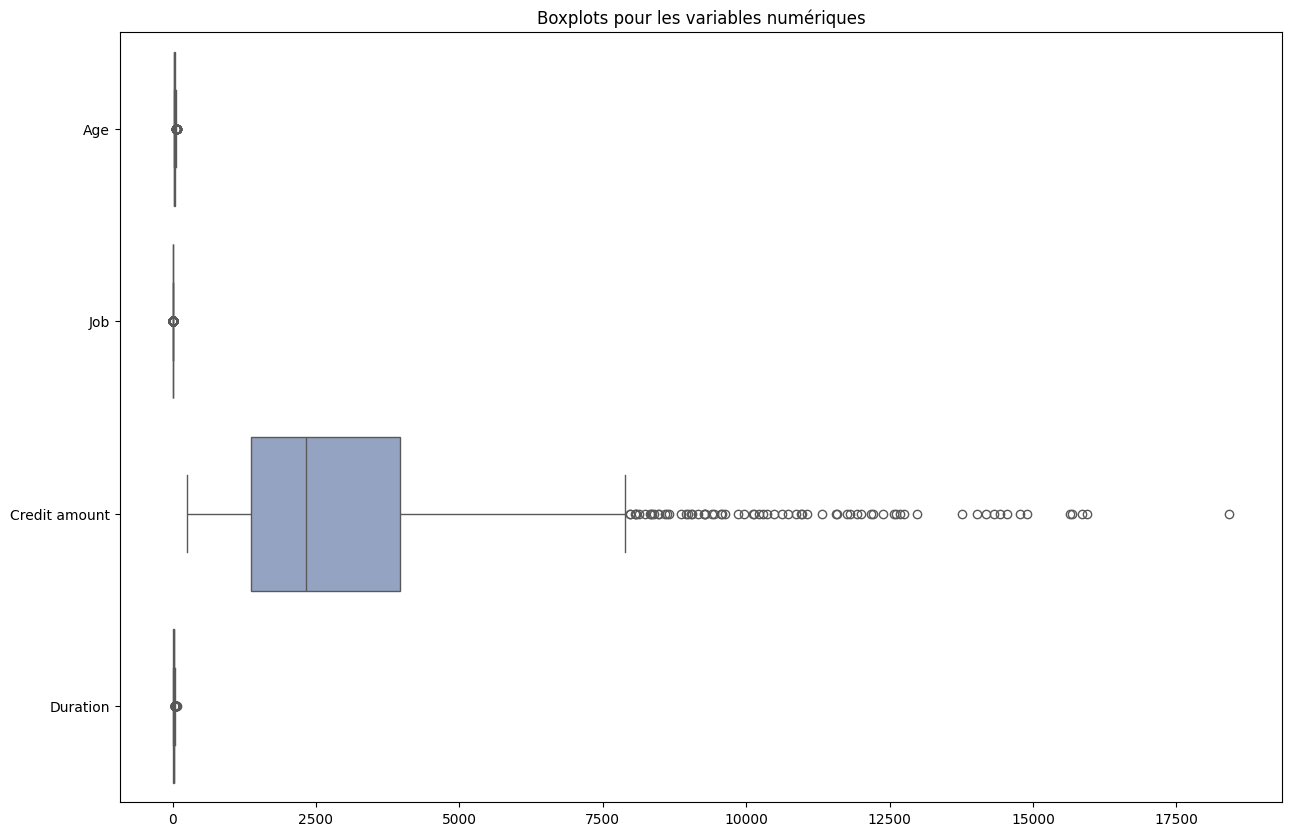

In [ ]:
#Présence ou non de données abérrantes

# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=[np.number])

# Créer un boxplot pour chaque variable numérique
plt.figure(figsize=(15, 10))  # Taille de la figure pour plus de lisibilité
sns.boxplot(data=numeric_df, orient='h', palette='Set2')
plt.title('Boxplots pour les variables numériques')
plt.show()


In [ ]:
fig_box = px.box(
    df,
    x='Risk',
    y='Credit amount',
    color='Risk',
    title='Distribution du montant de crédit selon le risque',
    labels={'Risk': 'Risque', 'Credit amount': 'Montant du crédit (DM)'}
)
fig_box.update_layout(autosize=True, template='plotly_dark')
fig_box.show()


In [ ]:
fig_scatter = px.scatter(
    df,
    x='Credit amount',
    y='Duration',
    color='Risk',
    title='Nuage de points : Montant du crédit vs Durée',
    labels={'Credit amount': 'Montant du crédit (DM)', 'Duration': 'Durée (mois)'},
    hover_data=['Age', 'Job']
)
fig_scatter.update_layout(template='plotly_dark')
fig_scatter.show()


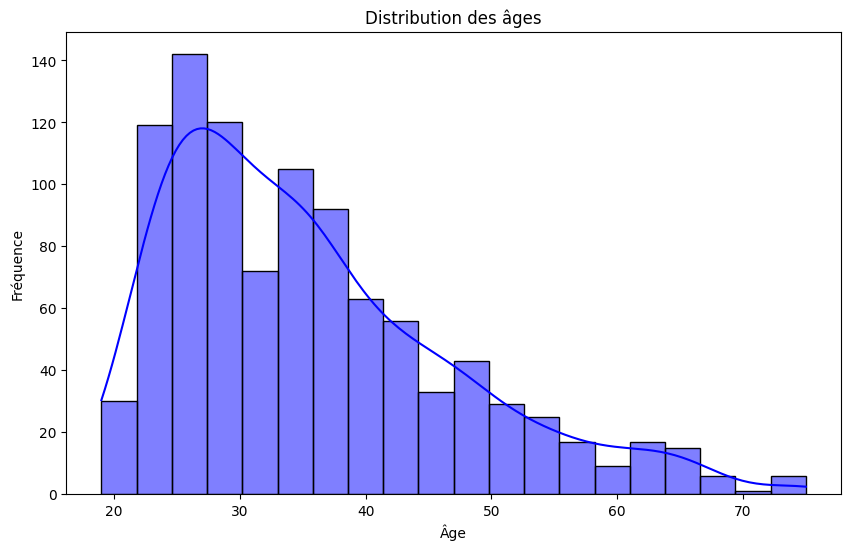

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer l'histogramme avec KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20, color="blue", edgecolor="black")
plt.title("Distribution des âges")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()


In [ ]:
# Test de Chi-carré pour les variables catégoriques


#Pour la variable 'Housing'
contingency_table = pd.crosstab(df['Housing'], df['Risk'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Statistique Chi2 pour la variable Housing : {chi2}, p-valeur : {p}")

#Pour la variable 'Job'
contingency_table = pd.crosstab(df['Job'], df['Risk'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Statistique Chi2 pour la variable Job : {chi2}, p-valeur : {p}")

#Pour la variable 'Sex'
contingency_table = pd.crosstab(df['Sex'], df['Risk'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Statistique Chi2 pour la variable Sex : {chi2}, p-valeur : {p}")

#Pour la variable 'Saving account'
contingency_table = pd.crosstab(df['Saving accounts'], df['Risk'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Statistique Chi2 pour la variable Saving account : {chi2}, p-valeur : {p}")

#Pour la variable 'Checking account'
contingency_table = pd.crosstab(df['Checking account'], df['Risk'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Statistique Chi2 pour la variable Checking account : {chi2}, p-valeur : {p}")

#Pour la variable 'Purpose'
contingency_table = pd.crosstab(df['Housing'], df['Risk'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Statistique Chi2 pour la variable Purpose : {chi2}, p-valeur : {p}")






Statistique Chi2 pour la variable Housing : 18.19984158256362, p-valeur : 0.00011167465374597684
Statistique Chi2 pour la variable Job : 1.8851560280131707, p-valeur : 0.5965815918843431
Statistique Chi2 pour la variable Sex : 5.348516218081436, p-valeur : 0.020739913068713305
Statistique Chi2 pour la variable Saving account : 18.479089902588285, p-valeur : 0.00035029499291971256
Statistique Chi2 pour la variable Checking account : 17.04082801454835, p-valeur : 0.00019935687308106684
Statistique Chi2 pour la variable Purpose : 18.19984158256362, p-valeur : 0.00011167465374597684


In [ ]:
#Test d’ANOVA pour les variables numériques (Credit amount)


# Regrouper les données par risque
bon_risque = df[df['Risk'] == 0]['Credit amount']
mauvais_risque = df[df['Risk'] == 1]['Credit amount']

# Effectuer un test ANOVA
f_stat, p_val = f_oneway(bon_risque, mauvais_risque)

print("Test ANOVA pour le montant du crédit et le risque :")
print(f"Statistique F : {f_stat}")
print(f"P-valeur : {p_val}")

# Interpréter les résultats
alpha = 0.05  # Niveau de signification
if p_val < alpha:
    print("Il existe une différence statistiquement significative dans le montant du crédit entre les groupes à bon risque et à mauvais risque.")
else:
    print("Il n'y a pas de différence statistiquement significative dans le montant du crédit entre les groupes à bon risque et à mauvais risque.")


Test ANOVA pour le montant du crédit et le risque :
Statistique F : nan
P-valeur : nan
Il n'y a pas de différence statistiquement significative dans le montant du crédit entre les groupes à bon risque et à mauvais risque.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning:

at least one input has length 0



In [ ]:
#Test d’ANOVA pour les variables numériques (Duration)

# Regrouper les données par risque
bon_risque = df[df['Risk'] == 0]['Duration']
mauvais_risque = df[df['Risk'] == 1]['Duration']

# Effectuer un test ANOVA
f_stat, p_val = f_oneway(bon_risque, mauvais_risque)

print("Test ANOVA pour la durée et le risque :")
print(f"Statistique F : {f_stat}")
print(f"P-valeur : {p_val}")

# Interpréter les résultats
alpha = 0.05  # Niveau de signification
if p_val < alpha:
    print("Il existe une différence statistiquement significative dans la durée entre les groupes à bon risque et à mauvais risque.")
else:
    print("Il n'y a pas de différence statistiquement significative dans la durée entre les groupes à bon risque et à mauvais risque.")


Test ANOVA pour la durée et le risque :
Statistique F : nan
P-valeur : nan
Il n'y a pas de différence statistiquement significative dans la durée entre les groupes à bon risque et à mauvais risque.


In [ ]:
#Test d’ANOVA pour les variables numériques (Duration)

# Regrouper les données par risque
bon_risque = df[df['Risk'] == 0]['Age']
mauvais_risque = df[df['Risk'] == 1]['Age']

# Effectuer un test ANOVA
f_stat, p_val = f_oneway(bon_risque, mauvais_risque)

print("Test ANOVA pour l'Age et le risque :")
print(f"Statistique F : {f_stat}")
print(f"P-valeur : {p_val}")

# Interpréter les résultats
alpha = 0.05  # Niveau de signification
if p_val < alpha:
    print("Il existe une différence statistiquement significative dans la durée entre les groupes à bon risque et à mauvais risque.")
else:
    print("Il n'y a pas de différence statistiquement significative dans la durée entre les groupes à bon risque et à mauvais risque.")


Test ANOVA pour l'Age et le risque :
Statistique F : nan
P-valeur : nan
Il n'y a pas de différence statistiquement significative dans la durée entre les groupes à bon risque et à mauvais risque.


#### **Conclusion pour l'exploration des données :**  
L'analyse exploratoire, incluant profilage, visualisations et tests statistiques, a permis de mieux comprendre les données et d’identifier les facteurs influents sur l'octroi de crédit :  

- **Structure des données** : 1 000 observations, 10 variables (3 catégorielles, 7 numériques) et des valeurs manquantes dans **Saving accounts** (18,3 %) et **Checking account** (39,4 %).  
- **Observations clés** :  
  - L’âge est asymétrique à droite, avec une moyenne de 36 ans.  
  - La majorité des clients sont des hommes (69 %) et des propriétaires (71 %).  
  - Les crédits sont souvent liés à l’achat de voitures, de radios/TV ou de meubles.  
  - Les **bons risques** (70 %) dominent les **mauvais risques** (30 %).
  - Notre variable **credit amount** présente des valeurs extremes ce qui nécessitera une normalisation lors de la préparation des données.
- **Relations significatives** :  
  - Les variables influentes sur le risque incluent **Credit amount**, **Duration**, **Saving accounts**, **Checking account**, **Purpose** et **Housing**.  
  - **Sex** a une significativité faible avec le risque
  - **Job** n’a pas de lien significatif avec le risque.  



### 2.Préparation des données

In [ ]:
#importer les bibliotheques requises
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split




In [ ]:
# Imputation des valeurs manquantes pour 'Saving accounts' et 'Checking account'
# Utilisation de la méthode de la catégorie la plus fréquente

for col in ['Saving accounts', 'Checking account']:
    most_frequent_category = df[col].mode()[0]
    df[col].fillna(most_frequent_category, inplace=True)

# Vérification de l'imputation
missing_data_after_imputation = df.isnull().sum() / len(df) * 100
print("Pourcentage de valeurs manquantes après imputation :\n", missing_data_after_imputation)

Pourcentage de valeurs manquantes après imputation :
 Age                 0.0
Sex                 0.0
Job                 0.0
Housing             0.0
Saving accounts     0.0
Checking account    0.0
Credit amount       0.0
Duration            0.0
Purpose             0.0
Risk                0.0
dtype: float64


<ipython-input-21-5c9048551795>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
# Variables catégorielles à encoder
categorical_features = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
target_feature = 'Risk'  # Variable cible

# Création des encodeurs pour les variables explicatives
encoders = {}
for col in categorical_features:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

# Encodage de la variable cible séparément
target_encoder = LabelEncoder()
df[target_feature] = target_encoder.fit_transform(df[target_feature])


print("Encodage terminé :")
print(df.head())


Encodage terminé :
   Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0   67    1    2        1                0                 0           1169   
1   22    0    2        1                0                 1           5951   
2   49    1    1        1                0                 0           2096   
3   45    1    2        0                0                 0           7882   
4   53    1    2        0                0                 0           4870   

   Duration  Purpose  Risk  
0         6        5     1  
1        48        5     0  
2        12        3     1  
3        42        4     1  
4        24        1     0  


In [ ]:
#Standardisation des variables

# Initialiser le scaler
scaler = StandardScaler()

# Appliquer la normalisation sur les colonnes Age, Duration et Credit amount
df[['Age', 'Credit amount', 'Duration']] = scaler.fit_transform(df[['Age', 'Credit amount', 'Duration']])

# Vérifier les premières lignes du DataFrame après normalisation
print(df[['Age', 'Credit amount', 'Duration']].head())


        Age  Credit amount  Duration
0  2.766456      -0.745131 -1.236478
1 -1.191404       0.949817  2.248194
2  1.183312      -0.416562 -0.738668
3  0.831502       1.634247  1.750384
4  1.535122       0.566664  0.256953


In [ ]:
# Séparer les caractéristiques (features) et la variable cible
X = df.drop(columns=['Risk'])  # Caractéristiques
y = df['Risk']  # Variable cible

# Séparation en ensemble d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)


Taille de l'ensemble d'entraînement : (800, 9)
Taille de l'ensemble de test : (200, 9)


#### **Conclusion pour la préparation des données :**

Après l’étape de préparation, nous avons accompli les actions suivantes :  

- **Imputation des valeurs manquantes :** Les variables *Saving accounts* (18,3 % de valeurs manquantes) et *Checking account* (39,4 %) ont été imputées en utilisant leur mode respectif, garantissant une cohérence avec leur distribution initiale.  
- **Encodage des variables catégorielles :** Les colonnes catégorielles (*Sex*, *Housing*, *Saving accounts*, *Checking account*, *Purpose*, et *Risk*) ont été encodées avec **Label Encoder**, permettant leur exploitation par les algorithmes de machine learning.  
- **Standardisation des variables numériques :** Les variables *Age*, *Duration*, et *Credit amount* ont été standardisées pour harmoniser leurs échelles, ce qui est crucial pour les modèles sensibles aux écarts d'échelle comme la régression logistique.  
- **Séparation des données :** Les données ont été divisées en deux ensembles : 80 % pour l'entraînement et 20 % pour le test, garantissant une évaluation objective des performances des modèles.

### 3.Développement d’un modèle prédictif

**Dans cette partie nous allons entrainer trois algorithme de machine learning à savoir la regression logistique, rendom forest et gradient boosting afin d'adopter le meilleur modele pour notre projet de credit score.**

In [ ]:
#Importation des bibliotheques necessaires

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, recall_score, roc_auc_score




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np


# Initialiser les modèles
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Stocker les résultats
results = []

In [ ]:

# Entraîner chaque modèle et calculer les métriques
for name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)

    # Prédictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calcul des métriques
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Stocker les résultats
    results.append({
        'Model': name,
        'Precision': precision,
        'AUC': auc
    })

# Afficher les résultats
for result in results:
    print(f"Model: {result['Model']}")
    print(f"  Precision: {result['Precision']:.4f}")
    if result['AUC'] is not None:
        print(f"  AUC: {result['AUC']:.4f}")
    else:
        print("  AUC: N/A (predict_proba non disponible)")
    print("-")


Model: Logistic Regression
  Precision: 0.6973
  AUC: 0.6452
-
Model: Random Forest
  Precision: 0.7471
  AUC: 0.6682
-
Model: Gradient Boosting
  Precision: 0.7229
  AUC: 0.6199
-
Model: Naive Bayes
  Precision: 0.7500
  AUC: 0.6720
-
Model: KNN
  Precision: 0.7305
  AUC: 0.6346
-


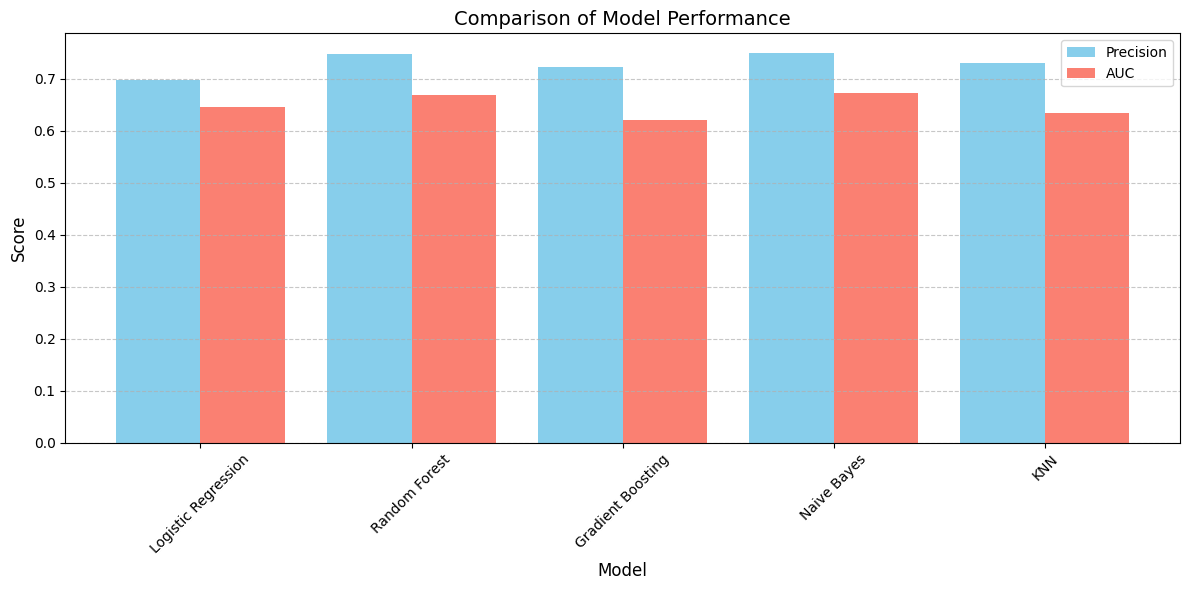

                 Model  Precision     AUC
0  Logistic Regression     0.6973  0.6452
1        Random Forest     0.7471  0.6682
2    Gradient Boosting     0.7229  0.6199
3          Naive Bayes     0.7500  0.6720
4                  KNN     0.7305  0.6346


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Exemple de résultats (remplacez-les par vos propres valeurs)
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Naive Bayes', 'KNN'],
    'Precision': [0.6973, 0.7471, 0.7229, 0.7500, 0.7305],
    'AUC': [0.6452, 0.6682, 0.6199, 0.6720, 0.6346]
}


# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)

# Créer un graphique à barres groupées
plt.figure(figsize=(12, 6))
width = 0.4
x = range(len(results['Model']))

# Barres pour la précision
plt.bar([pos - width/2 for pos in x], results_df['Precision'], width, label='Precision', color='skyblue')

# Barres pour l'AUC
plt.bar([pos + width/2 for pos in x], results_df['AUC'], width, label='AUC', color='salmon')

# Personnalisation
plt.xticks(x, results['Model'], rotation=45, fontsize=10)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Comparison of Model Performance', fontsize=14)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()
print(results_df)


**Commentaire :**

 Les résultats du graphique montre que, **Naive Bayes** semble être le meilleur modèle en termes de précision (avec 75%), mais son AUC est légèrement inférieur à celui de **Random Forest**, qui a une bonne précision (74,71%) et un AUC assez élevé (0.6682).
**Random Forest** et **Naive Bayes** semblent offrir de bonnes performances globales, mais **Random Forest** pourrait avoir un léger avantage si l'on prend en compte l'AUC, ce qui est souvent plus pertinent pour évaluer la capacité de discrimination du modèle.

**Logistic Regression** et **KNN** montrent des résultats relativement moyens en termes de précision et d'AUC. Ils sont à éviter car nous cherchons à maximiser à la fois la précision et l'AUC.

**Gradient Boosting** a la plus faible AUC et pourrait nécessiter un ajustement supplémentaire.

 Nous allons maintenant nous concentrer sur l'optimisation de ces deux modèles performants, en ajustant certains paramètres afin de déterminer lequel est le plus robuste entre le **Random Forest** et le **Naive Bayes.**

#### Optimisation des hyperparamétres
**Les modèles Random Forest et Naive Bayes présentent des performances similaires. Par conséquent, dans cette section d'optimisation, nous allons nous concentrer sur l'ajustement des hyperparamètres de ces deux modèles afin de déterminer lequel est le plus robuste.**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


# Initialisation des modèles
models = {
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Naive Bayes': GaussianNB()
}

param_grids = {
    'Random Forest': {
        'n_estimators': [100, 300, 200],
        'max_depth': [10, 20, 30, 50, None],
        'min_samples_split': [2, 3, 5, 10],
        'min_samples_leaf': [1, 2, 5, 10],
        'bootstrap': [True],
        'max_features': ['sqrt', 'log2'],
        'class_weight': ['balanced']
    },

    'Naive Bayes': {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    }
}



Optimisation de Random Forest en cours...
Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Meilleurs paramètres pour Random Forest: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Précision pondérée : 0.7566, F1-score : 0.7566, AUC : 0.6624


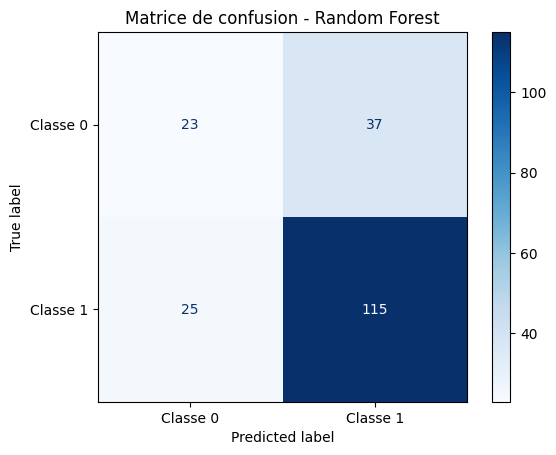

Optimisation de Naive Bayes en cours...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Meilleurs paramètres pour Naive Bayes: {'var_smoothing': 1e-09}
Précision pondérée : 0.7500, F1-score : 0.7500, AUC : 0.6720


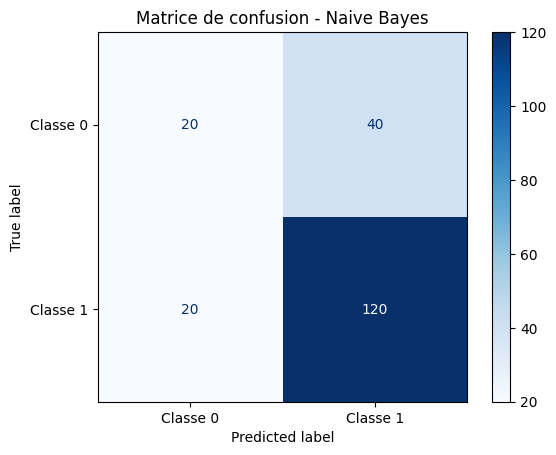

Random Forest - Précision : 0.7566, F1-score : 0.7566, AUC : 0.6624
Naive Bayes - Précision : 0.7500, F1-score : 0.7500, AUC : 0.6720


In [ ]:

# Fonction d'optimisation et d'évaluation avec gestion des classes déséquilibrées
def optimize_and_evaluate(model_name, model, param_grid, is_random_forest=False):
    print(f"Optimisation de {model_name} en cours...")

    # Si c'est Random Forest, inclure la gestion des classes déséquilibrées
    if is_random_forest:
        model.set_params(class_weight='balanced')

    # GridSearchCV pour optimisation des hyperparamètres avec scoring adapté
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        verbose=2,
        scoring='roc_auc'  # Utilisation d'une métrique adaptée
    )
    grid_search.fit(X_train, y_train)

    # Meilleur modèle trouvé
    best_model = grid_search.best_estimator_

    # Prédictions
    y_pred = best_model.predict(X_test)

    # Calcul des métriques
    precision = precision_score(y_test, y_pred)
    f1 = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

    print(f"Meilleurs paramètres pour {model_name}: {grid_search.best_params_}")
    print(f"Précision pondérée : {precision:.4f}, F1-score : {f1:.4f}, AUC : {auc:.4f}")

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classe 0', 'Classe 1'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matrice de confusion - {model_name}")
    plt.show()

    return best_model, precision, f1, auc

# Optimisation et évaluation des modèles
best_rf_model, rf_precision, rf_f1, rf_auc = optimize_and_evaluate(
    'Random Forest',
    RandomForestClassifier(random_state=42),
    param_grids['Random Forest'],
    is_random_forest=True
)
best_nb_model, nb_precision, nb_f1, nb_auc = optimize_and_evaluate(
    'Naive Bayes',
    GaussianNB(),
    param_grids['Naive Bayes']
)

# Résultats finaux
print(f"Random Forest - Précision : {rf_precision:.4f}, F1-score : {rf_f1:.4f}, AUC : {rf_auc:.4f}")
print(f"Naive Bayes - Précision : {nb_precision:.4f}, F1-score : {nb_f1:.4f}, AUC : {nb_auc:.4f}")


Optimisation de KNN en cours...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs paramètres pour KNN: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
Précision pondérée : 0.7209, F1-score : 0.7209, AUC : 0.6223


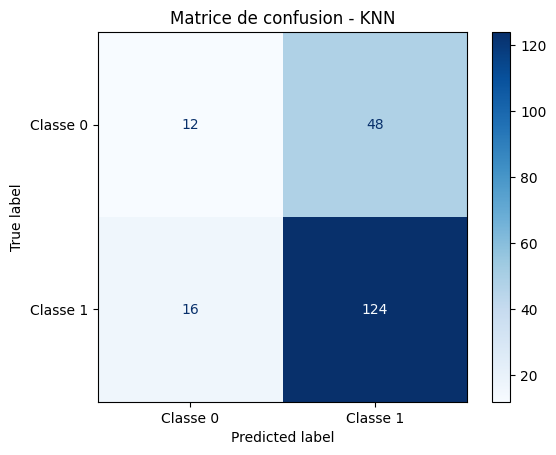

KNN - Précision : 0.7209, F1-score : 0.7209, AUC : 0.6223


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Ajout de KNN dans les modèles
models['KNN'] = KNeighborsClassifier()

# Grille de recherche des hyperparamètres pour KNN
param_grids['KNN'] = {
    'n_neighbors': [3, 5, 7, 10],  # Nombre de voisins
    'weights': ['uniform', 'distance'],  # Type de pondération
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance utilisée
}
best_knn_model, knn_precision, knn_f1, knn_auc = optimize_and_evaluate(
    'KNN',
    KNeighborsClassifier(),
    param_grids['KNN']
)

# Résultats finaux pour tous les modèles
print(f"KNN - Précision : {knn_precision:.4f}, F1-score : {knn_f1:.4f}, AUC : {knn_auc:.4f}")
#matrice de confusion
y_pred_knn = best_knn_model.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)


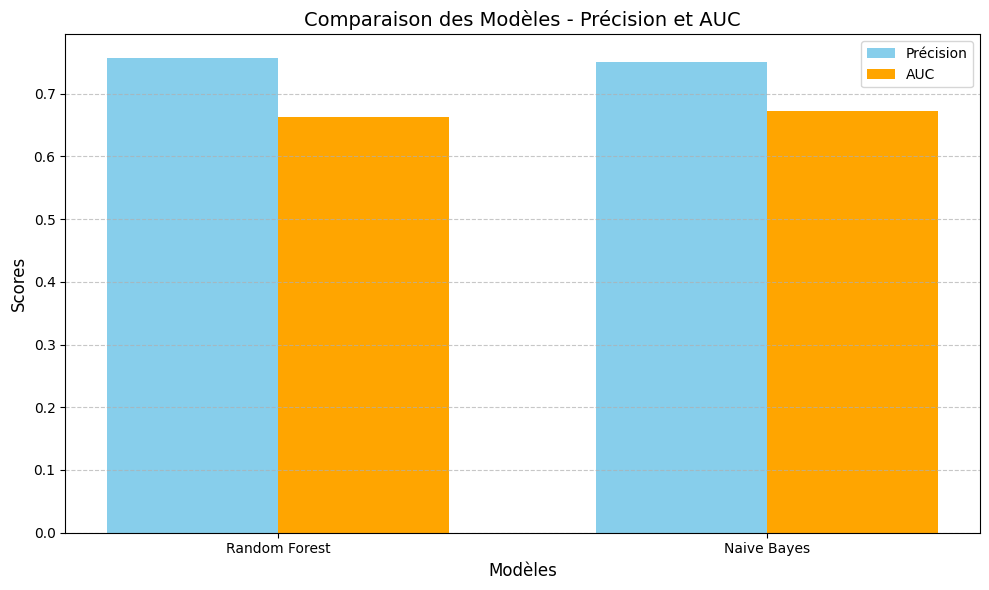

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Résultats des modèles
results = {
    'Random Forest': {'Précision': 0.7566, 'AUC': 0.6624},
    'Naive Bayes': {'Précision': 0.7500, 'AUC': 0.6720},
    # Ajoutez d'autres modèles si nécessaire
}

# Extraire les noms des modèles, les précisions et les AUC
models = list(results.keys())
precision_scores = [results[model]['Précision'] for model in models]
auc_scores = [results[model]['AUC'] for model in models]

# Largeur des barres
bar_width = 0.35
index = np.arange(len(models))

# Tracer les barres
plt.figure(figsize=(10, 6))
plt.bar(index, precision_scores, bar_width, label='Précision', color='skyblue')
plt.bar(index + bar_width, auc_scores, bar_width, label='AUC', color='orange')

# Ajouter les étiquettes
plt.xlabel('Modèles', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparaison des Modèles - Précision et AUC', fontsize=14)
plt.xticks(index + bar_width / 2, models, fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()


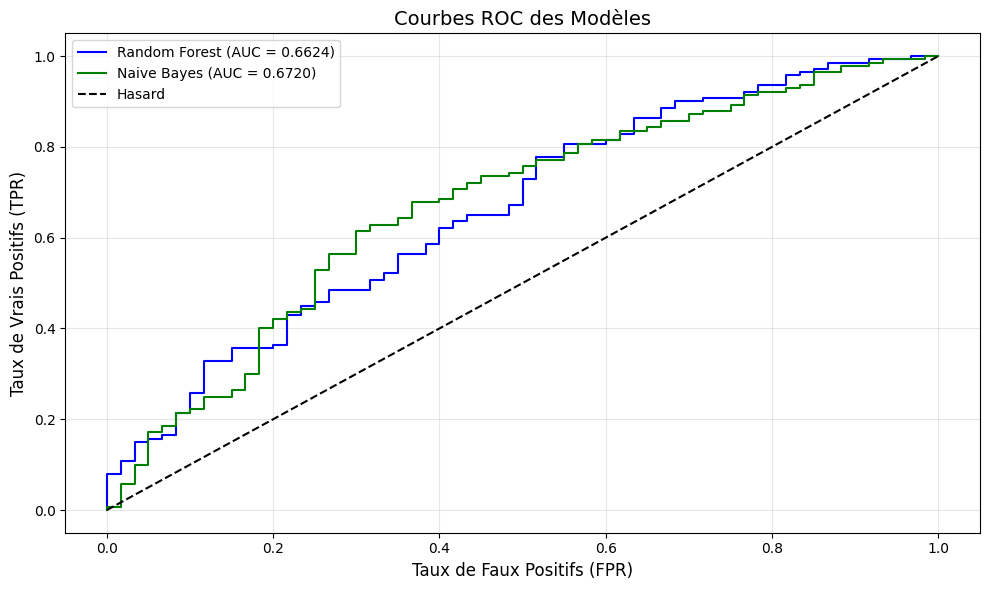

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtenez les probabilités prédictives pour chaque modèle
rf_probs = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive
nb_probs = best_nb_model.predict_proba(X_test)[:, 1]

# Calcul des courbes ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)

# Calcul des AUC
auc_rf = auc(fpr_rf, tpr_rf)
auc_nb = auc(fpr_nb, tpr_nb)

# Tracer les courbes ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})', color='blue')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.4f})', color='green')

# Ligne diagonale pour le hasard
plt.plot([0, 1], [0, 1], 'k--', label='Hasard')

# Personnalisation du graphique
plt.title('Courbes ROC des Modèles', fontsize=14)
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Affichage
plt.tight_layout()
plt.show()


In [ ]:
# Calcul de la matrice de confusion pour Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_optimized)

# Affichage de la matrice de confusion
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf.classes_)
disp_rf.plot(cmap='Blues')
plt.title('Matrice de confusion - Random Forest optimisé')
plt.show()


### **Conclusion pour le Développement d’un Modèle Prédictif :**

Dans cette étude, nous avons entraîné cinq algorithmes de machine learning afin de résoudre un problème de scoring : **Régression Logistique**, **Random Forest**, **Gradient Boosting (XGBoost)**, **Naive Bayes**, et **K-Nearest Neighbors (KNN)**. Voici les résultats comparatifs obtenus :

#### 1. **Régression Logistique**
- **Précision** : **69.73%** (Classe positive)
- **AUC-ROC** : **0.6452**
- **Analyse** :  
  Bien que la régression logistique montre un score modéré en précision, son AUC indique une faible capacité à différencier les classes positives et négatives. Cela souligne des limites dans la gestion des faux positifs et négatifs.

#### 2. **Random Forest**
- **Précision** : **74.71%** (Classe positive)
- **AUC-ROC** : **0.6682**
- **Analyse** :  
  Random Forest surpasse la régression logistique en termes de précision et d'AUC, offrant des performances plus équilibrées. Cependant, il montre encore des limites sur certaines classes minoritaires.

#### 3. **Gradient Boosting (XGBoost)**
- **Précision** : **72.29%** (Classe positive)
- **AUC-ROC** : **0.6199**
- **Analyse** :  
  XGBoost montre une précision compétitive, bien que son AUC-ROC soit légèrement inférieure à celle de Random Forest. Cela peut être dû à une sensibilité plus élevée aux hyperparamètres.

#### 4. **Naive Bayes**
- **Précision** : **75.00%** (Classe positive)
- **AUC-ROC** : **0.6720**
- **Analyse** :  
  Naive Bayes offre les meilleures performances en termes de précision et d'AUC, ce qui en fait un modèle simple mais efficace dans ce contexte.

#### 5. **K-Nearest Neighbors (KNN)**
- **Précision** : **73.05%** (Classe positive)
- **AUC-ROC** : **0.6346**
- **Analyse** :  
  KNN montre une bonne précision mais un AUC inférieur à Random Forest et Naive Bayes. Ce modèle est également plus sensible aux choix des hyperparamètres (k) et à la distribution des données.


### **Résumé Comparatif des Modèles :**

| Modèle                | Précision (%) | AUC-ROC  |
|-----------------------|---------------|----------|
| Régression Logistique | 69.73         | 0.6452   |
| Random Forest         | 74.71         | 0.6682   |
| Gradient Boosting     | 72.29         | 0.6199   |
| Naive Bayes           | 75.00         | 0.6720   |
| KNN                   | 73.05         | 0.6346   |




---


### **Optimisation des Hyperparamètres**

Afin d'améliorer les résultats obtenus, nous avons utilisé la technique **GridSearchCV** pour optimiser les hyperparamètres des modèles. Cependant, seules les performances des modèles **Random Forest** et **Naive Bayes** ont été significativement améliorées après cette étape.

#### **Random Forest Optimisé** :
- **Précision pondérée** : **75.66%**
- **F1-score** : **75.66%**
- **AUC-ROC** : **0.6624**
- **Analyse** :  
  L'optimisation a permis d'augmenter légèrement la précision et de stabiliser le modèle, ce qui montre une meilleure gestion des classes déséquilibrées.

#### **Naive Bayes Optimisé** :
- **Précision pondérée** : **75.00%**
- **F1-score** : **75.00%**
- **AUC-ROC** : **0.6720**
- **Analyse** :  
  Naive Bayes conserve sa simplicité tout en offrant une performance équilibrée après optimisation, notamment avec le meilleur score AUC parmi tous les modèles testés.

**NB:**

Les résultats des autres modèles, notamment **Régression Logistique** et **Gradient Boosting**, n'ont pas montré d'amélioration significative, et ils n'ont donc pas été inclus dans la section des modèles optimisés.

---

### Analyse des Matrices de Confusion
### **Interprétation avec les deux modalités de risque : Bon Risque et Mauvais Risque**  

Dans le contexte de **scoring de crédit**, les deux classes peuvent être interprétées comme suit :  
- **0 (Négatif)** = **Mauvais Risque** (clients non solvables).  
- **1 (Positif)** = **Bon Risque** (clients solvables).  

La matrice de confusion obtenue :

| **Classe réelle \ Prédite** | **0 (Mauvais Risque)** | **1 (Bon Risque)** |  
|-----------------------------|------------------------|--------------------|  
| **0 (Mauvais Risque)**      | **23** (Vrai Négatif)  | **37** (Faux Positif) |  
| **1 (Bon Risque)**          | **25** (Faux Négatif)  | **115** (Vrai Positif) |  

---

### **Analyse détaillée des risques :**  

1. **Faux Positifs (36) - Mauvais Risque classé comme Bon Risque**  

2. **Faux Négatifs (25) - Bon Risque classé comme Mauvais Risque**  
---

### **Performances globales avec les deux modalités de risque :**  

- **Sensibilité (Recall) pour les Bons Risques (1)** :  
   \[
   \text{Recall} = \frac{\text{Vrai Positifs (115)}}{\text{Total des Bons Risques (115 + 25)}} = \frac{115}{140} \approx 0.82 \, (82\%)
   \]  
   - Cela signifie que le modèle identifie correctement **82 % des clients solvables**.  

- **Précision pour les Bons Risques (1)** :  
   \[
   \text{Précision} = \frac{\text{Vrai Positifs (115)}}{\text{Total prédits Bon Risque (115 + 36)}} = \frac{115}{151} \approx 0.76 \, (76\%)
   \]  
   - Cela signifie que **76 % des clients classés comme bon risque** sont réellement solvables.  

- **Impact des Faux Positifs et Faux Négatifs** :  
   - La **réduction des faux positifs (36)** doit être priorisée pour éviter les pertes financières associées à des crédits accordés à des mauvais risques.  
   - La réduction des **faux négatifs (25)** est également importante pour ne pas perdre des clients solvables, mais elle vient en **second plan** par rapport aux faux positifs.  

---

### **Stratégies pour réduire les faux positifs et améliorer le scoring :**  

1. **Optimisation des hyperparamètres** :  
   - Affiner davantage les paramètres du **Random Forest** pour améliorer la séparation entre les **bons risques** et les **mauvais risques**.  
   - Utiliser des méthodes comme **GridSearchCV** ou **RandomizedSearchCV** pour tester différentes configurations.  

2. **Ajustement du seuil de classification** :  
   - Par défaut, le modèle utilise un seuil de probabilité de **0.5** pour prédire la classe.  
   - En abaissant légèrement ce seuil (par exemple, à **0.45**), on peut **réduire les faux positifs**, tout en surveillant l’impact sur les faux négatifs.  


### **Conclusion**  

Le **Random Forest optimisé** offre des performances correctes avec une **sensibilité de 82 %** et une **précision de 76 %** pour les **bons risques**. Cependant, les **36 faux positifs** nécessitent une attention particulière, car ils représentent un risque financier important.  

L’objectif principal est donc de **réduire les faux positifs** en ajustant le seuil de décision, optimisant les hyperparamètres et améliorant la sélection des variables. Cela permettra d’obtenir un modèle de **scoring plus robuste** et de mieux distinguer les **bons risques** des **mauvais risques** pour une gestion optimale des crédits.
### Perspectives d'Amélioration

Pour réduire davantage les erreurs (notamment les faux positifs), nous pourrions envisager les approches suivantes :

1. **Rééquilibrage des classes** : Techniques comme SMOTE ou undersampling pour réduire les biais dus à la classe majoritaire.
2. **Seuil de décision ajusté** : Ajuster le seuil de classification pour privilégier la réduction des faux positifs.
3. **Tuning supplémentaire** : Optimisation avancée des hyperparamètres avec RandomizedSearch ou BayesSearch.

En conclusion, le **Random Forest optimisé** reste le choix le plus robuste pour notre problème de scoring à l'heure actuelle.


##### **Exemple de prediction**

In [ ]:
import joblib


# Sauvegarder le meilleur modèle
joblib.dump(best_rf, 'best_random_forest_model.pkl')

print("Le meilleur modèle Random Forest a été sauvegardé avec succès !")



In [ ]:
from google.colab import files

# Télécharger le fichier local
files.download('best_random_forest_model.pkl')


In [ ]:
# Sauvegarder les encoders pour utilisation ultérieure
import joblib
joblib.dump(encoders, 'encoders.pkl')

 #Sauvegarder le scaler
joblib.dump(scaler, 'scaler.pkl')

# Télécharger les fichiers sur votre ordinateur
files.download('encoders.pkl')
files.download('scaler.pkl')

In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from google.colab import files  # Nécessaire pour le téléchargement dans Colab

# Charger les encodeurs et scaler depuis les fichiers sauvegardés
encoders = joblib.load('encoders.pkl')
scaler = joblib.load('scaler.pkl')
model = joblib.load('best_random_forest_model.pkl')

# Charger vos nouvelles données dans un DataFrame
nouvelles_donnees = pd.DataFrame({
    'Age': [25, 40, 30, 50, 28, 35, 45, 32, 26, 48, 60, 29, 38, 42, 23, 55, 33, 44, 31, 47, 22,
            30, 39, 19, 75, 33, 43, 31, 29, 45],
    'Sex': ['male', 'female', 'male', 'female', 'male', 'female', 'male', 'female',
            'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female',
            'male', 'female', 'male', 'female', 'female', 'male', 'female','male','male',
            'female', 'female', 'male', 'male', 'female'],
    'Job': [2, 3, 1, 2, 0, 3, 2, 1, 3, 2, 0, 1, 3, 2, 0,
            2, 1, 3, 2, 3, 1, 3, 2, 2, 1, 1, 2, 2, 3, 1],
    'Housing': ['rent', 'own', 'rent', 'own', 'free', 'own', 'rent', 'free',
                'rent', 'own', 'free', 'rent', 'own', 'own', 'free', 'own',
                'rent', 'own', 'rent', 'own','own', 'rent', 'rent', 'free','free',
                'free', 'rent', 'own', 'own', 'rent'],
    'Saving accounts': ['moderate', 'little', 'quite rich', 'moderate', 'little',
                        'rich', 'moderate', 'little', 'little', 'quite rich',
                        'moderate', 'little', 'rich','rich', 'little', 'quite rich', 'rich','moderate', 'little', 'little',
                        'moderate', 'moderate', 'rich', 'little', 'quite rich',
                        'quite rich', 'moderate', 'rich', 'moderate', 'little'],
    'Checking account': ['little', 'moderate', 'rich', 'rich', 'little', 'rich', 'little', 'little', 'rich',
                        'moderate', 'little', 'moderate', 'rich', 'little', 'rich', 'little', 'little', 'rich',
                        'little', 'moderate','rich', 'little', 'rich', 'rich','moderate', 'little', 'moderate', 'rich',
                         'rich', 'little'],
    'Credit amount': [5000, 10000, 3000, 15000, 2000, 25000, 8000, 1500, 4000,
                      12000, 6000, 7000, 20000, 9000, 1500, 5000, 8000, 15000,
                      4000, 18000, 20000, 14000, 5000, 2500, 30000, 12000, 7000, 4000, 20000, 9000],
    'Duration': [12, 24, 6, 36, 9, 48, 18, 6, 12, 30, 15, 20, 48, 22, 8, 10,
                 18, 36, 12, 40, 4, 9, 18, 17, 9, 8, 10, 18, 36, 12],
    'Purpose': ['car', 'furniture/equipment', 'education', 'business', 'radio/TV',
                'repairs', 'domestic appliances', 'vacation/others', 'car',
                'education', 'radio/TV', 'domestic appliances', 'repairs',
                'business', 'vacation/others', 'education', 'furniture/equipment',
                'car', 'repairs', 'business', 'car', 'furniture/equipment', 'education', 'business', 'radio/TV',
                'domestic appliances', 'business', 'vacation/others', 'radio/TV', 'furniture/equipment']
})

# Conserver une copie des données originales pour la visualisation
donnees_originales = nouvelles_donnees.copy()

# Liste des colonnes catégorielles
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Appliquer les encodeurs aux colonnes catégorielles
for col in categorical_cols:
    if col in nouvelles_donnees.columns:
        nouvelles_donnees[col] = encoders[col].transform(nouvelles_donnees[col])

# Appliquer le scaler aux colonnes numériques
nouvelles_donnees[['Age', 'Credit amount', 'Duration']] = scaler.transform(nouvelles_donnees[['Age', 'Credit amount', 'Duration']])

# Faire les prédictions
predictions = model.predict(nouvelles_donnees)

# Ajouter les prédictions aux données originales
donnees_originales['Prediction'] = predictions

# Enregistrer les données originales avec les prédictions dans un fichier CSV
donnees_originales.to_csv('nouvelles_donnees_avec_predictions.csv', index=False)

# Télécharger le fichier en local
files.download('nouvelles_donnees_avec_predictions.csv')


In [ ]:
# Enregistrer les données originales avec les prédictions dans un fichier CSV
donnees_originales.to_csv('nouvelles_donnees.csv', index=False)

# Télécharger le fichier en local
files.download('nouvelles_donnees.csv')

                                                  
                                         Bonne réception et à bientôt 😊






